In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
df=pd.read_csv("Customer Churn.csv ",encoding="unicode_escape")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# inspection of data----first step of EDA

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [114]:
# replacing blanks with 0 AS tenure is 0 

In [115]:
df["TotalCharges"] =df["TotalCharges"].replace(" ","0")
df["TotalCharges"] =df["TotalCharges"].astype("float")

In [116]:
df.isnull().sum().sum()

0

In [117]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [118]:
df["customerID"].duplicated().sum()

0

we convert the values  seniorcitizen of 0 and 1 into yes or no for better understanding.

In [119]:

def conv(value):
    if value== 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"]= df["SeniorCitizen"].apply(conv)

In [120]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


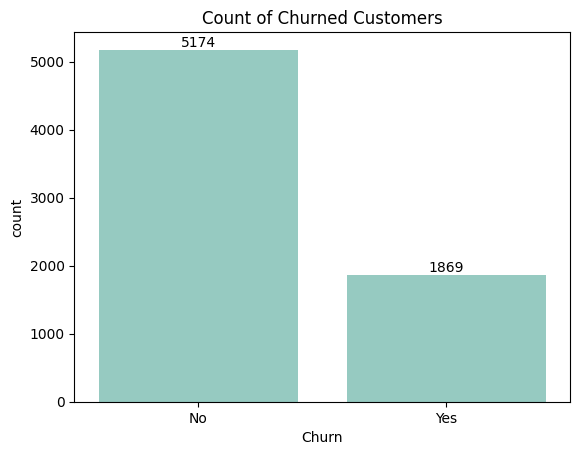

In [121]:
ax=sns.countplot(x="Churn",data=df)


for bars in ax.containers:
    ax.bar_label(bars)  
plt.title("Count of Churned Customers") 
sns.set_palette("husl")
plt.show()

In [122]:
gb=df.groupby("Churn").agg({"Churn":"count"})
gb


,Churn
Churn,
No,5174
Yes,1869


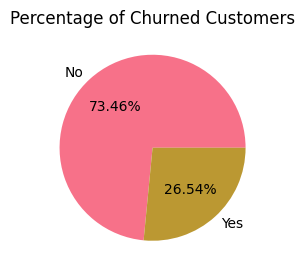

In [123]:
plt.figure(figsize= (3,4))
gb=df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"],labels=gb.index,autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers")
sns.set_palette('coolwarm')
plt.show()


 from the given chart we can conclude that 26.54% of our customers have churned out.now lets explore the reason behind it.
 

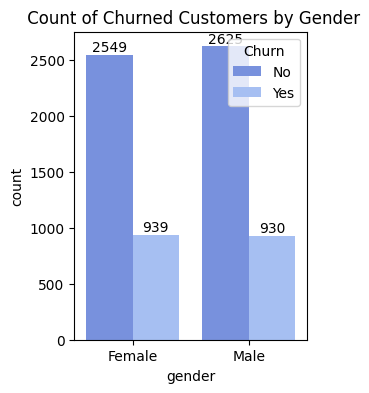

In [124]:
plt.figure(figsize=(3,4))
ax1=sns.countplot(x="gender",data=df,hue="Churn")

for bars in ax1.containers:
    ax1.bar_label(bars)
sns.set_palette('Set3')
   
plt.title(" Count of Churned Customers by Gender")    
plt.show()

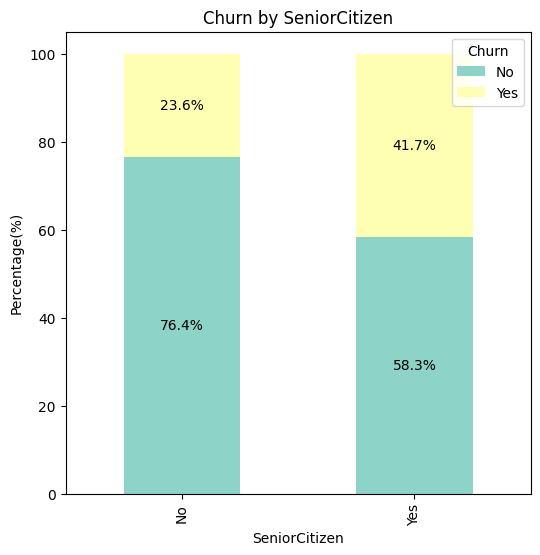

In [139]:
#plt.figure(figsize=(4,5))

total_counts = df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack()*100

fig,ax=plt.subplots(figsize=(6,6))

total_counts.plot(kind="bar",stacked=True, ax=ax)

for p in ax.patches:
    width,height=p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.text(x+width/2, y+height/2, f'{height:.1f}%',ha="center",va="center")
    
plt.title("Churn by SeniorCitizen")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage(%)")
plt.legend(title="Churn",loc="upper right")
plt.show()

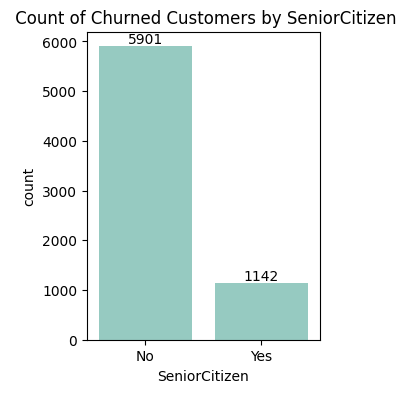

In [143]:
plt.figure(figsize=(3,4))
ax2=sns.countplot(x="SeniorCitizen",data=df)

for bars in ax2.containers:
    ax2.bar_label(bars)
sns.set_palette('Set3')
   
plt.title(" Count of Churned Customers by SeniorCitizen")    
plt.show()

#Comparitively a greated percentage of people in senior citizen category have churned.

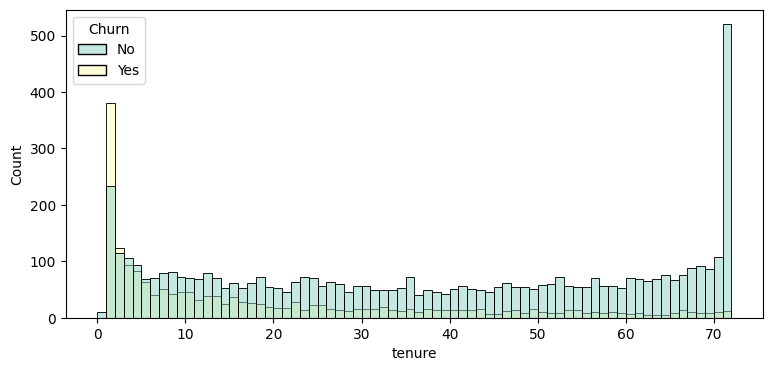

In [150]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

 people who have used our services for a long time have stayed and people who have used our services 1 or 2 months have churned

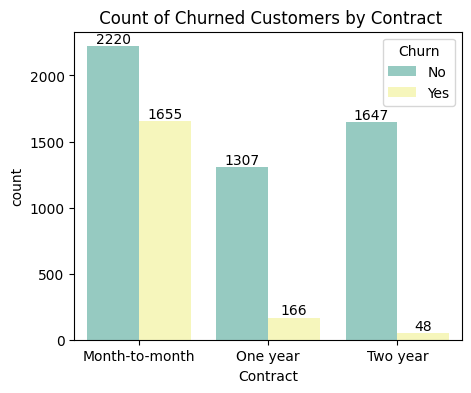

In [154]:
plt.figure(figsize=(5,4))
ax2=sns.countplot(x="Contract",data=df,hue="Churn")

for bars in ax2.containers:
    ax2.bar_label(bars)
sns.set_palette('Set3')
   
plt.title(" Count of Churned Customers by Contract")    
plt.show()

In [ ]:
people who have month to month contract are likely to churn then from those who have 1 or 2 years of contract.

In [162]:
df.columns
#df.columns.values

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

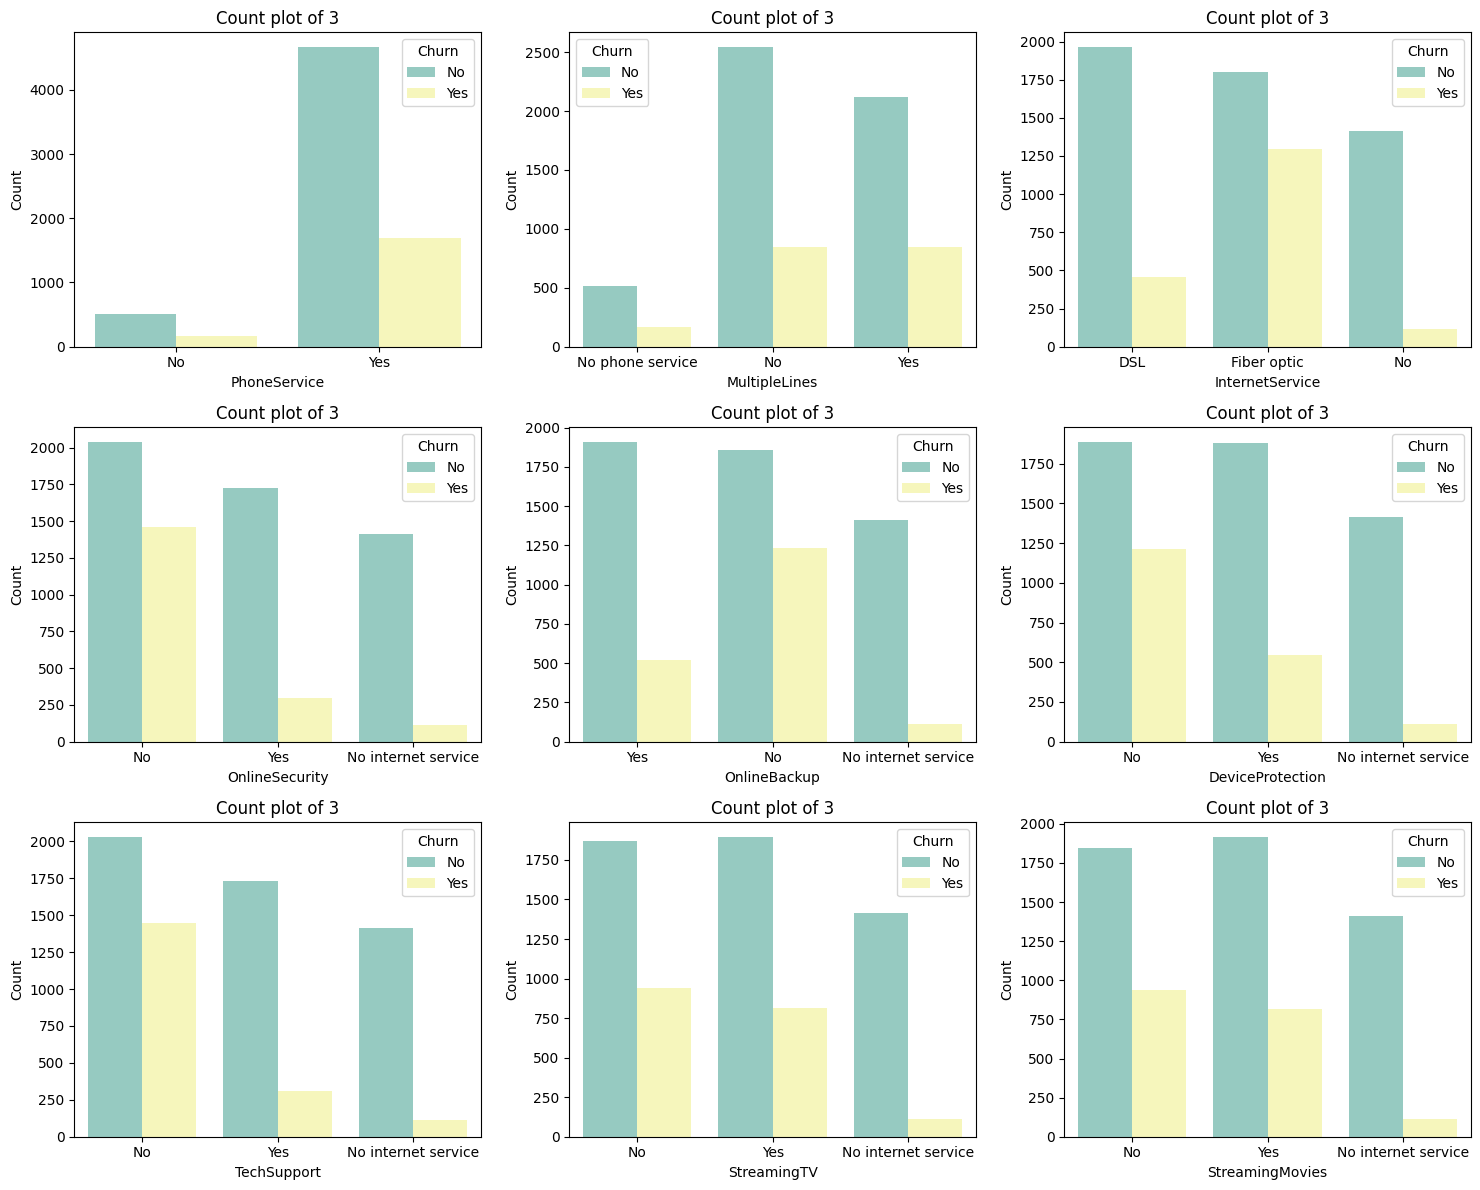

In [169]:
columns=['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']

n_cols=3
n_rows=(len(columns) + n_cols-1) // n_cols # calculate no.of rows needed.
fig,axes=plt.subplots(n_rows,n_cols,figsize=(15,n_rows*4))

axes=axes.flatten()

for i,col in enumerate(columns):
    sns.countplot(x=col,data=df,ax=axes[i],hue="Churn")
    axes[i].set_title(f'Count plot of {n_cols}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

for j in range(i+1,len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

In [ ]:
# summary
The visualizations present count plots showing customer churn(yes or no) across various service features such as PhoneService, MultipleLines, 
InternetService and onlineSecurity. The majority of customers who do not have services like Phoneservice,InternetService and onlineSecurity enabled.
For services OnlineBackup,TechSupport, and Streaming TV, churn rates are noticibly higher when these services are not used or are unavailable.
The charts emphasis the relationship between service usage and customer churn.


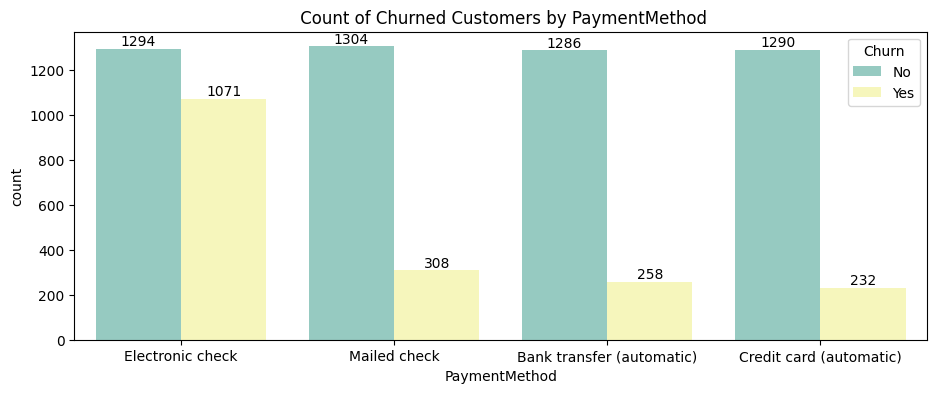

In [172]:
plt.figure(figsize=(11,4))
ax2=sns.countplot(x="PaymentMethod",data=df,hue="Churn")

for bars in ax2.containers:
    ax2.bar_label(bars)
sns.set_palette('Set3')
   
plt.title(" Count of Churned Customers by PaymentMethod")    
plt.show()

 customer is likely to churn when he is using electronic check as a payment method.